# Network Models

Probably the easiest kinds of statistical models for us to think about are the *network models*. These types of models (like the name imples) describe the random processes which you'd find when you're only looking at one network. We can have models which assume all of the nodes connect to each other essentially randomly, models which assume that the nodes are in distinct *communities*, and many more.

The important realization to make about statistical models is that a model is *not* a network: it's the random process that *creates* a network. You can sample from a model a bunch of times, and because it's a random process, you'll end up with networks that look a little bit different each time -- but if you sampled a lot of networks and then averaged them, then you'd likely be able to get a reasonable ballpark estimation of what the model that they come from looks like.  

Let's pretend that we have a network, and the network is unweighted (meaning, we only have edges or not-edges) and undirected (meaning, edges connect nodes both ways). It'd have an adjacency matrix which consists of only 1's and 0's, because the only information we care about is whether there's an edge or not. The model that generated this network is pretty straightforward: there's just some universal probability that each node connects to each other node, and there are 10 nodes.

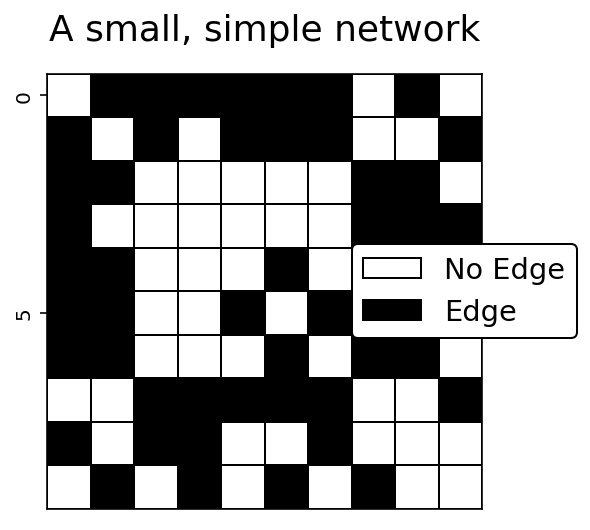

In [1]:
import matplotlib.pyplot as plt
from graspologic.simulations import er_np
from graphbook_code import binary_heatmap
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots(figsize=(4,4))
n = 10
p = .5
A = er_np(n, p)
binary_heatmap(A, ax=ax, yticklabels=5, linewidths=1, linecolor="black", title="A small, simple network");

This small, simple network is one of many possible networks that we can generate with this model. Here are some more:

Text(0.5, 0.98, 'Three small, simple networks')

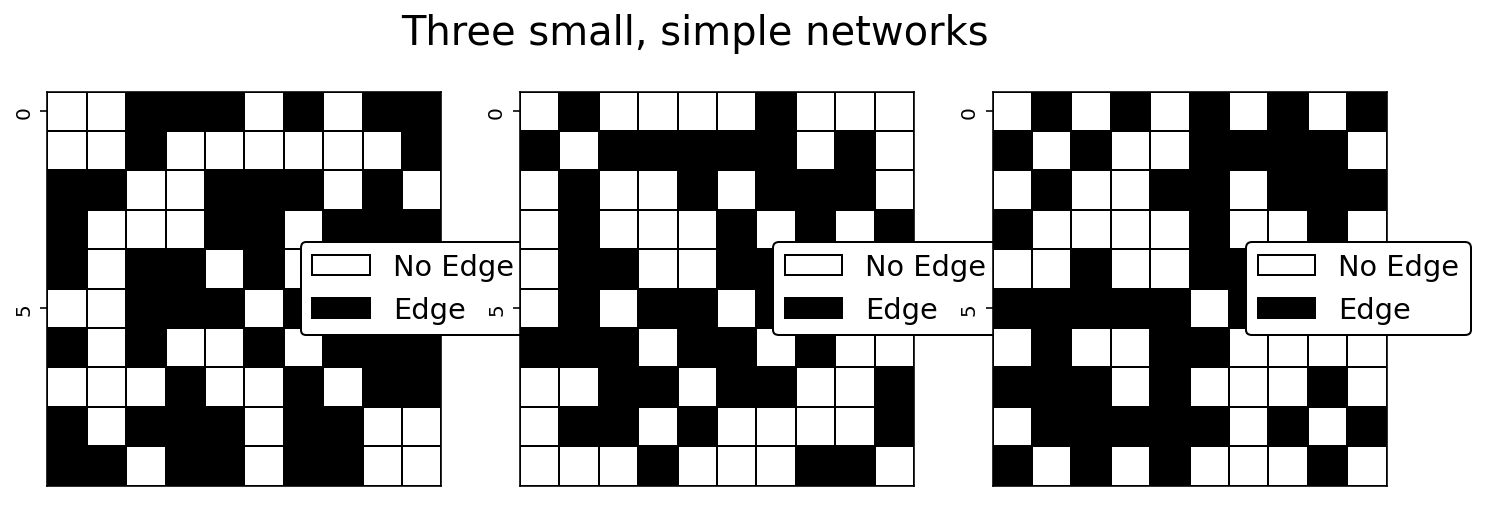

In [2]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

for ax in axs.flat:
    A = er_np(n, p)
    hmap = binary_heatmap(A, ax=ax, yticklabels=5, linewidths=1, linecolor="black")
plt.suptitle("Three small, simple networks", fontsize=20)

One reasonable question to ask is how *many* possible networks we could make in this simple scenario? We've already made four, and it seems like there are more that this model could potentially generate.

As it turns out, "more" is a pretty massive understatement. To actually figure out the number, think about the first potential edge: there are two possibilities (edge or no edge), so you can generate two networks from a one-node model. Now, let's add an additional node. For each of the first two possibilities, there are two more -- so there are $2 \times 2 = 4$ total possible networks. Every node that we add doubles the number of networks - and since a network with $n$ nodes has $n \times n$ edges, the total number of possible networks ends up being $2^{n \times n} = 2^{n^2}$! So this ten-node model can generate $2^{10^2} = 2^{100}$ networks, which is, when you think carefully, an absurdly, ridiculously big number.

Throughout many of the succeeding sections, we will attempt to make the content accessible to readers with, and without, a more technical background. To this end, we have added sections with trailing asterisks (\*). While we believe these sections build technical depth, we don't think they are critical to understanding many of the core ideas for network machine learning. In contrast with unstarred sections, these sections will assume familiarity with more advanced mathematical and probability concepts.